<a href="https://colab.research.google.com/github/Yiqing35/ESG-Investing/blob/main/ESG_Investing_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install plotnine --upgrade

     |████████████████████████████████| 4.7 MB 9.1 MB/s 
     |████████████████████████████████| 63 kB 959 kB/s 
     |████████████████████████████████| 9.8 MB 35.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.7 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Attempting uninstall: mizani
    Found existing installation: mizani 0.6.0
    Uninstalling mizani-0.6.0:
      Successfully uninstalled mizani-0.6.0
  Attempting uninstall: plotnine
    Found existing installation: plotnine 0.6.0
    Uninstalling plotnine-0.6.0:
      Successfully uninstalled plotnine-0.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source 

In [2]:
import pandas as pd
import numpy as np
from plotnine import *
import plotnine
from mizani.formatters import scientific_format, percent_format, currency_format
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url='https://raw.githubusercontent.com/Yiqing35/ESG-Investing/main/factors_monthly_data_updated.csv'
df_returns_all=pd.read_csv(url)

In [4]:
df_returns_all.head(10)

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF,QMJ,BAB,UMD,Momentum,TSMOM,Carry,ESG,E,S,G
0,1963/7/1,-0.39,-0.44,-0.89,0.68,-1.23,0.27,0.684436,0.812285,0.270105,0.97,NaN,NaN,NaN,NaN,1.435945,2.210925
1,1963/8/1,5.07,-0.75,1.68,0.36,-0.34,0.25,-0.991462,-1.215830,1.591270,1.01,NaN,NaN,NaN,NaN,1.677137,-0.981874
2,1963/9/1,-1.57,-0.55,0.08,-0.71,0.29,0.27,0.623597,1.068651,-1.057191,0.19,NaN,NaN,NaN,NaN,0.394058,-0.798462
3,1963/10/1,2.53,-1.37,-0.14,2.80,-2.02,0.29,2.001582,-1.875605,2.801265,3.12,NaN,NaN,NaN,NaN,0.314545,4.155985
4,1963/11/1,-0.85,-0.89,1.81,-0.51,2.31,0.27,-0.862888,-0.519820,-1.807065,-0.74,NaN,NaN,NaN,NaN,4.181741,-0.893011
5,1963/12/1,1.83,-2.07,-0.08,0.03,-0.04,0.29,0.317778,0.012884,1.796375,1.75,NaN,NaN,NaN,NaN,-1.427347,0.259355
6,1964/1/1,2.24,0.11,1.47,0.17,1.51,0.30,0.480656,0.612817,1.057534,0.86,NaN,NaN,NaN,NaN,1.795315,1.936055
7,1964/2/1,1.54,0.30,2.74,-0.05,0.90,0.26,-0.439578,-0.501539,0.783778,0.26,NaN,NaN,NaN,NaN,0.352514,1.651642
8,1964/3/1,1.41,1.36,3.36,-2.21,3.19,0.31,-1.460262,-0.188251,0.615571,0.75,NaN,NaN,NaN,NaN,-5.483360,1.638550
9,1964/4/1,0.10,-1.59,-0.58,-1.27,-1.04,0.29,1.443070,2.525904,-0.247511,-0.58,NaN,NaN,NaN,NaN,-0.203540,1.624309


In [5]:
url1='https://raw.githubusercontent.com/Yiqing35/ESG-Investing/main/ESG_USA_updated.csv'
df_USA_ESG=pd.read_csv(url1)

In [6]:
df_USA_ESG.head(10)

,Date,PX_LAST,Change,% Change
0,2021/12/1,521.95,21.12,4.217000
1,2021/11/1,500.83,-8.51,-1.670790
2,2021/10/1,509.34,43.68,9.380235
3,2021/9/1,465.66,-24.06,-4.913012
4,2021/8/1,489.72,14.65,3.083756
5,2021/7/1,475.07,13.59,2.944873
6,2021/6/1,461.48,11.91,2.649198
7,2021/5/1,449.57,3.62,0.811750
8,2021/4/1,445.95,22.10,5.214109
9,2021/3/1,423.85,18.48,4.558798


In [10]:
df_merge=df_USA_ESG.merge(df_returns_all,how='inner',on=['Date'])
df_merge.head(10)

,Date,PX_LAST,Change,% Change,Mkt-RF,SMB,HML,RMW,CMA,RF,QMJ,BAB,UMD,Momentum,TSMOM,Carry,ESG,E,S,G
0,2021/11/1,500.83,-8.51,-1.670790,-1.55,-1.74,-0.52,7.38,1.60,0.0,5.594689,0.562617,1.627323,0.82,-11.480222,NaN,NaN,NaN,NaN,NaN
1,2021/10/1,509.34,43.68,9.380235,6.65,-2.69,-0.44,1.74,-1.48,0.0,1.918425,1.364075,3.949964,3.21,6.435551,NaN,NaN,NaN,NaN,NaN
2,2021/9/1,465.66,-24.06,-4.913012,-4.37,1.25,5.09,-1.94,2.08,0.0,-1.902527,-2.252827,1.855840,1.57,1.079761,NaN,NaN,NaN,NaN,NaN
3,2021/8/1,489.72,14.65,3.083756,2.90,-0.79,-0.13,-0.26,-1.67,0.0,-0.253650,0.413611,2.115689,2.52,1.307778,NaN,NaN,NaN,NaN,NaN
4,2021/7/1,475.07,13.59,2.944873,1.27,-4.56,-1.75,5.37,-0.55,0.0,6.773336,3.770762,-2.837012,-2.29,-3.482193,0.834628,NaN,NaN,NaN,NaN
5,2021/6/1,461.48,11.91,2.649198,2.75,-0.24,-7.76,-2.14,-0.99,0.0,-2.386313,0.258619,2.734935,2.24,-3.899216,1.358464,NaN,NaN,NaN,NaN
6,2021/5/1,449.57,3.62,0.811750,0.29,1.20,7.04,2.34,3.10,0.0,1.679259,-0.744476,1.146850,0.88,2.927895,0.629720,NaN,NaN,NaN,NaN
7,2021/4/1,445.95,22.10,5.214109,4.93,-3.09,-0.93,2.30,-2.79,0.0,2.155666,0.324674,0.899645,1.14,4.421424,1.909963,NaN,NaN,NaN,NaN
8,2021/3/1,423.85,18.48,4.558798,3.08,-0.92,7.41,6.35,3.48,0.0,4.766645,-2.979722,-4.518482,-6.11,-0.063772,1.876175,NaN,NaN,NaN,NaN
9,2021/2/1,405.37,12.38,3.150207,2.78,4.52,7.18,0.45,-1.89,0.0,0.328802,-1.928451,-7.552345,-7.93,-4.525695,1.528140,NaN,NaN,NaN,NaN


Regression

In [11]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 0 to 250
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   PX_LAST    251 non-null    float64
 2   Change     251 non-null    float64
 3   % Change   251 non-null    float64
 4   Mkt-RF     251 non-null    float64
 5   SMB        251 non-null    float64
 6   HML        251 non-null    float64
 7   RMW        251 non-null    float64
 8   CMA        251 non-null    float64
 9   RF         251 non-null    float64
 10  QMJ        251 non-null    float64
 11  BAB        251 non-null    float64
 12  UMD        251 non-null    float64
 13  Momentum   251 non-null    float64
 14  TSMOM      251 non-null    float64
 15  Carry      247 non-null    float64
 16  ESG        146 non-null    float64
 17  E          118 non-null    float64
 18  S          219 non-null    float64
 19  G          219 non-null    float64
dtypes: float64

In [12]:
y = df_merge['% Change']
x = sm.add_constant(df_merge['Mkt-RF'])

result=sm.OLS(y,x).fit()
print(result.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.976    
Dependent Variable: % Change         AIC:                533.0682 
Date:               2022-02-05 00:55 BIC:                540.1191 
No. Observations:   251              Log-Likelihood:     -264.53  
Df Model:           1                F-statistic:        1.010e+04
Df Residuals:       249              Prob (F-statistic): 1.59e-203
R-squared:          0.976            Scale:              0.48576  
--------------------------------------------------------------------
            Coef.    Std.Err.      t       P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const       0.0600     0.0445     1.3475   0.1790   -0.0277   0.1477
Mkt-RF      0.9926     0.0099   100.4789   0.0000    0.9732   1.0121
------------------------------------------------------------------
Omnibus:               16.824       Durbin-Watson:          1.929 
Pro

In [13]:
df_merge_notnull=df_merge.dropna(axis=0,how='any')

In [14]:
df_merge_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 32 to 149
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       118 non-null    object 
 1   PX_LAST    118 non-null    float64
 2   Change     118 non-null    float64
 3   % Change   118 non-null    float64
 4   Mkt-RF     118 non-null    float64
 5   SMB        118 non-null    float64
 6   HML        118 non-null    float64
 7   RMW        118 non-null    float64
 8   CMA        118 non-null    float64
 9   RF         118 non-null    float64
 10  QMJ        118 non-null    float64
 11  BAB        118 non-null    float64
 12  UMD        118 non-null    float64
 13  Momentum   118 non-null    float64
 14  TSMOM      118 non-null    float64
 15  Carry      118 non-null    float64
 16  ESG        118 non-null    float64
 17  E          118 non-null    float64
 18  S          118 non-null    float64
 19  G          118 non-null    float64
dtypes: float6

In [15]:
df_merge_notnull

,Date,PX_LAST,Change,% Change,Mkt-RF,SMB,HML,RMW,CMA,RF,QMJ,BAB,UMD,Momentum,TSMOM,Carry,ESG,E,S,G
32,2019/3/1,287.62,5.07,1.794373,1.10,-3.46,-4.05,0.78,-0.99,0.19,-0.869828,0.282656,2.806001,2.16,5.797930,-0.975908,3.133672,-0.578862,-1.448504,0.714923
33,2019/2/1,282.55,10.40,3.821422,3.40,1.73,-2.68,0.21,-1.61,0.18,-0.243298,0.013440,0.349543,0.85,-0.481677,2.401457,1.586567,0.725349,-1.548889,-2.455346
34,2019/1/1,272.15,18.94,7.479957,8.41,3.01,-0.44,-0.78,-1.53,0.21,-3.649077,-0.641835,-7.126306,-8.65,-6.057801,1.301734,-2.297570,0.735600,0.262794,1.776333
35,2018/12/1,253.21,-23.43,-8.469491,-9.55,-2.91,-1.90,-0.03,0.20,0.19,1.460813,-0.039520,2.501588,2.12,-0.449452,-3.421280,1.371949,-0.190574,2.663030,-0.607913
36,2018/11/1,276.64,10.02,3.758158,1.69,-0.76,0.26,-0.62,0.40,0.18,2.209990,-0.100485,-0.981236,-1.41,-2.557525,-2.600128,-1.697098,-1.855363,1.421344,-0.340502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2009/10/1,90.88,-1.60,-1.730104,-2.59,-4.92,-4.20,4.17,-1.46,0.00,5.608828,0.814698,1.466946,2.61,-2.305315,-1.818240,5.523923,-0.450696,-0.206368,2.542191
146,2009/9/1,92.48,3.64,4.097253,4.08,2.72,1.04,1.25,0.35,0.01,-2.516808,-0.384255,-5.373940,-4.79,0.888006,0.976340,1.559976,-2.623751,-1.338499,1.278517
147,2009/8/1,88.84,2.77,3.218311,3.33,-0.08,7.63,-2.92,3.30,0.01,-6.372567,-2.273604,-9.992603,-9.07,2.061929,2.250420,-2.735943,4.152753,1.111137,-0.059121
148,2009/7/1,86.07,6.36,7.978924,7.72,2.40,4.84,-0.36,3.15,0.01,-4.390598,-3.619407,-4.658236,-5.58,-3.384087,2.247460,-2.326185,-0.221364,-0.119005,0.831843


In [16]:
y = df_merge_notnull['% Change']
x = sm.add_constant(df_merge_notnull[['Mkt-RF','ESG']])

result=sm.OLS(y,x).fit()
print(result.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.979   
Dependent Variable: % Change         AIC:                184.2845
Date:               2022-02-05 00:56 BIC:                192.5966
No. Observations:   118              Log-Likelihood:     -89.142 
Df Model:           2                F-statistic:        2673.   
Df Residuals:       115              Prob (F-statistic): 3.91e-97
R-squared:          0.979            Scale:              0.27219 
-------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
const       0.0351     0.0510    0.6884   0.4926   -0.0659   0.1361
Mkt-RF      0.9540     0.0138   69.3249   0.0000    0.9267   0.9812
ESG         0.0572     0.0289    1.9785   0.0503   -0.0001   0.1144
-----------------------------------------------------------------
Omnibus:       

In [19]:
y = df_merge_notnull['% Change']
x = sm.add_constant(df_merge_notnull[['Mkt-RF','SMB','HML','Momentum ']])

result=sm.OLS(y,x).fit()
print(result.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.979   
Dependent Variable: % Change         AIC:                181.9139
Date:               2022-02-05 01:00 BIC:                195.7673
No. Observations:   118              Log-Likelihood:     -85.957 
Df Model:           4                F-statistic:        1388.   
Df Residuals:       113              Prob (F-statistic): 4.96e-95
R-squared:          0.980            Scale:              0.26245 
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const          0.0343    0.0501   0.6841  0.4953  -0.0650   0.1336
Mkt-RF         0.9619    0.0140  68.8283  0.0000   0.9342   0.9896
SMB           -0.0666    0.0214  -3.1189  0.0023  -0.1090  -0.0243
HML           -0.0040    0.0229  -0.1756  0.8609  -0.0495   0.0414
Momentum      -0.000

In [20]:
y = df_merge_notnull['% Change']
x = sm.add_constant(df_merge_notnull[['Mkt-RF','SMB','HML','Momentum ','ESG']])

result=sm.OLS(y,x).fit()
print(result.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.979   
Dependent Variable: % Change         AIC:                183.0820
Date:               2022-02-05 01:01 BIC:                199.7061
No. Observations:   118              Log-Likelihood:     -85.541 
Df Model:           5                F-statistic:        1108.   
Df Residuals:       112              Prob (F-statistic): 1.33e-93
R-squared:          0.980            Scale:              0.26294 
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const          0.0296    0.0505   0.5872  0.5582  -0.0703   0.1296
Mkt-RF         0.9643    0.0142  67.6946  0.0000   0.9361   0.9926
SMB           -0.0600    0.0226  -2.6516  0.0092  -0.1049  -0.0152
HML            0.0025    0.0241   0.1055  0.9162  -0.0452   0.0503
Momentum      -0.000

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_smooth.py:206: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.


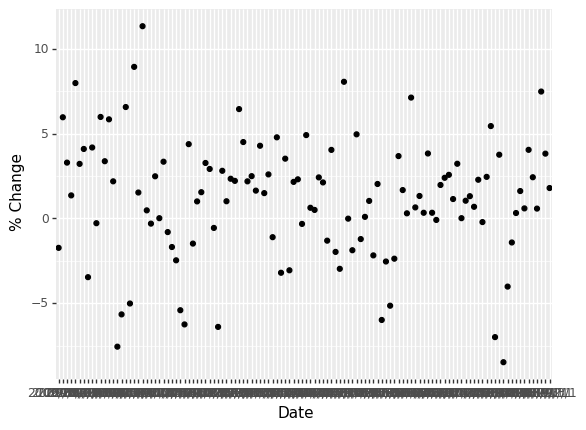

<ggplot: (8761811111877)>

In [ ]:
(
    ggplot(df_merge_notnull, aes(x='Date', y='% Change'))
      + geom_point()
      + geom_smooth(method='lm')
)